In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Read all csv files from the data folder
data_files = os.listdir("data/train")

# Dataframes list
train_df = []

#Loop through files and add each one to a dataframe
for data_file in data_files:
    file_path = os.path.join("data/train", data_file)
    dataframe = pd.read_csv(file_path)
    train_df.append(dataframe)

In [3]:
# adjust the time column for each dataframe
for i in range(1, len(train_df)):
    current_df = train_df[i]
    current_df["time"] += train_df[i - 1]["time"].max() + 0.02

In [5]:
train_df[0].head()

time  x-acceleration  y-acceleration  z-acceleration output
0  0.00           0.577           0.532           0.598   drum
1  0.02           0.587           0.539           0.600   drum
2  0.04           0.590           0.537           0.595   drum
3  0.06           0.589           0.533           0.591   drum
4  0.08           0.584           0.534           0.590   drum

In [8]:
# Add all dataframes together into a single dataframe
for i in range(len(train_df)):
    train_df[i] = train_df[i].reset_index(drop=True)
df = pd.concat(train_df, ignore_index=True)

df

time  x-acceleration  y-acceleration  z-acceleration   output
0        0.00           0.577           0.532           0.598     drum
1        0.02           0.587           0.539           0.600     drum
2        0.04           0.590           0.537           0.595     drum
3        0.06           0.589           0.533           0.591     drum
4        0.08           0.584           0.534           0.590     drum
...       ...             ...             ...             ...      ...
21844  436.88           0.750           0.522           0.394  unknown
21845  436.90           0.747           0.520           0.391  unknown
21846  436.92           0.748           0.520           0.397  unknown
21847  436.94           0.753           0.523           0.397  unknown
21848  436.96           0.752           0.523           0.395  unknown

[21849 rows x 5 columns]

In [10]:
# ...and save it to a csv file
df.to_csv("data/train/train_data.csv", index=False)

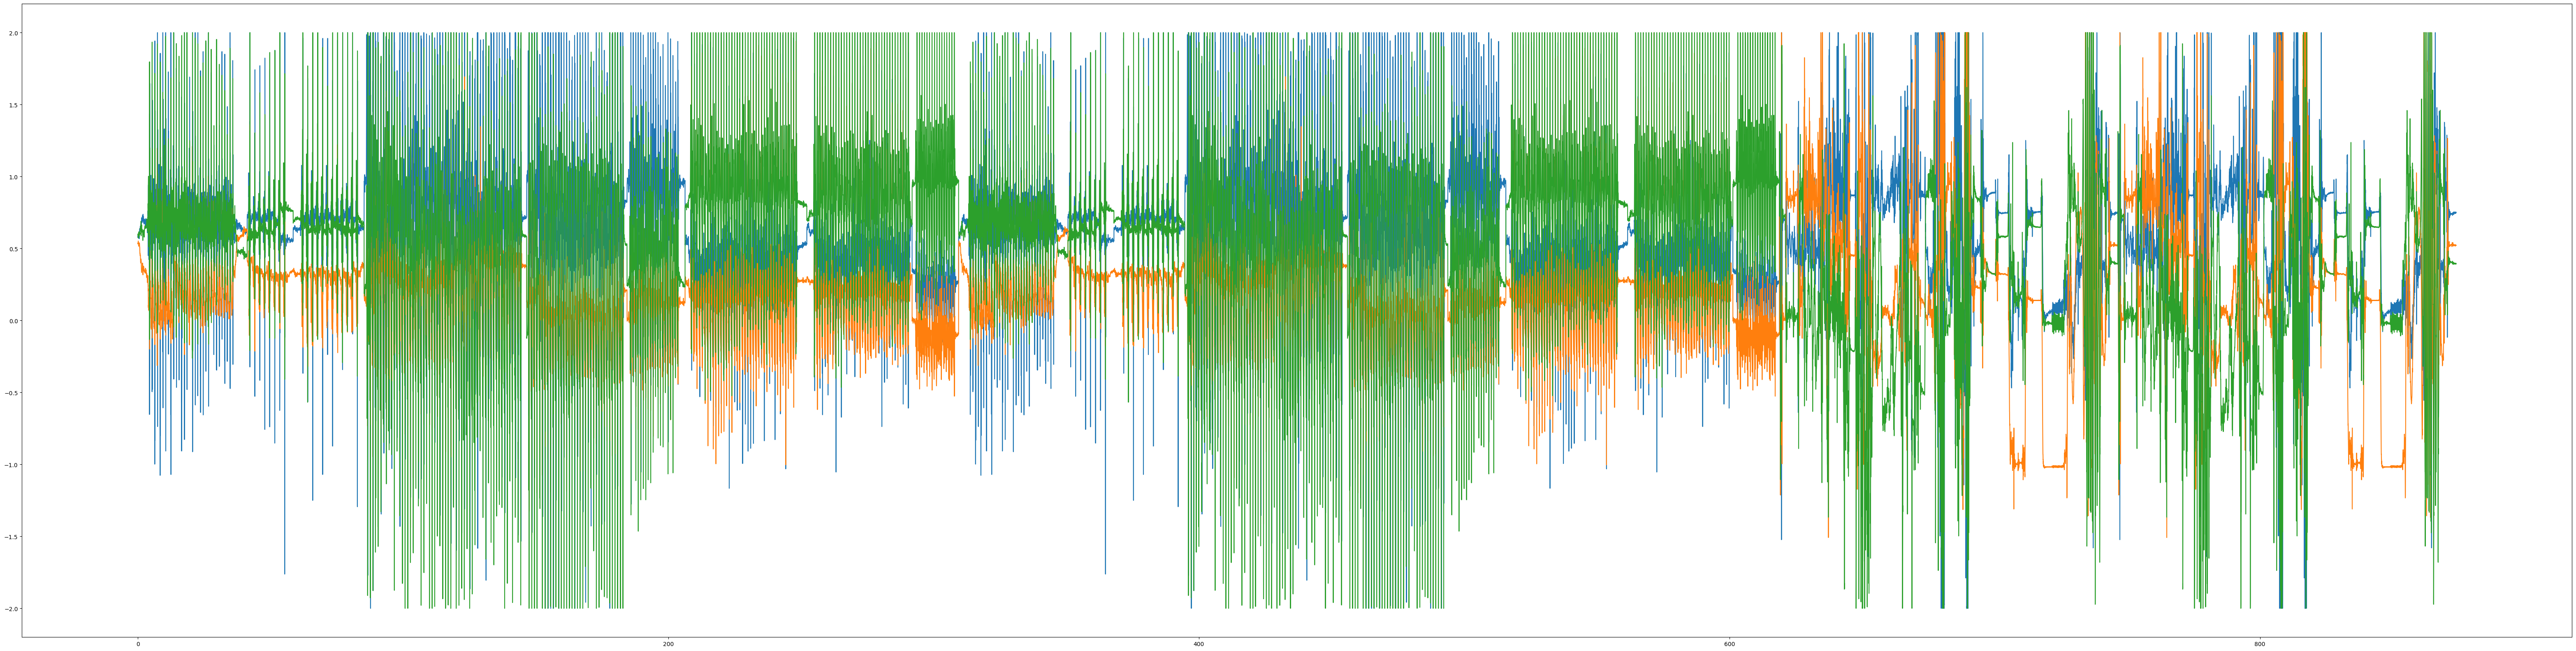

In [7]:
fig = plt.subplots(figsize=(80, 20))

plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0.08

for col in ["x-acceleration", "y-acceleration", "z-acceleration"]:
    plt.plot(df.iloc[:, 0], df[col])

In [8]:
# Read the CSV file
file_path = os.path.join("data/test", "test.csv")
test_df = pd.read_csv(file_path)


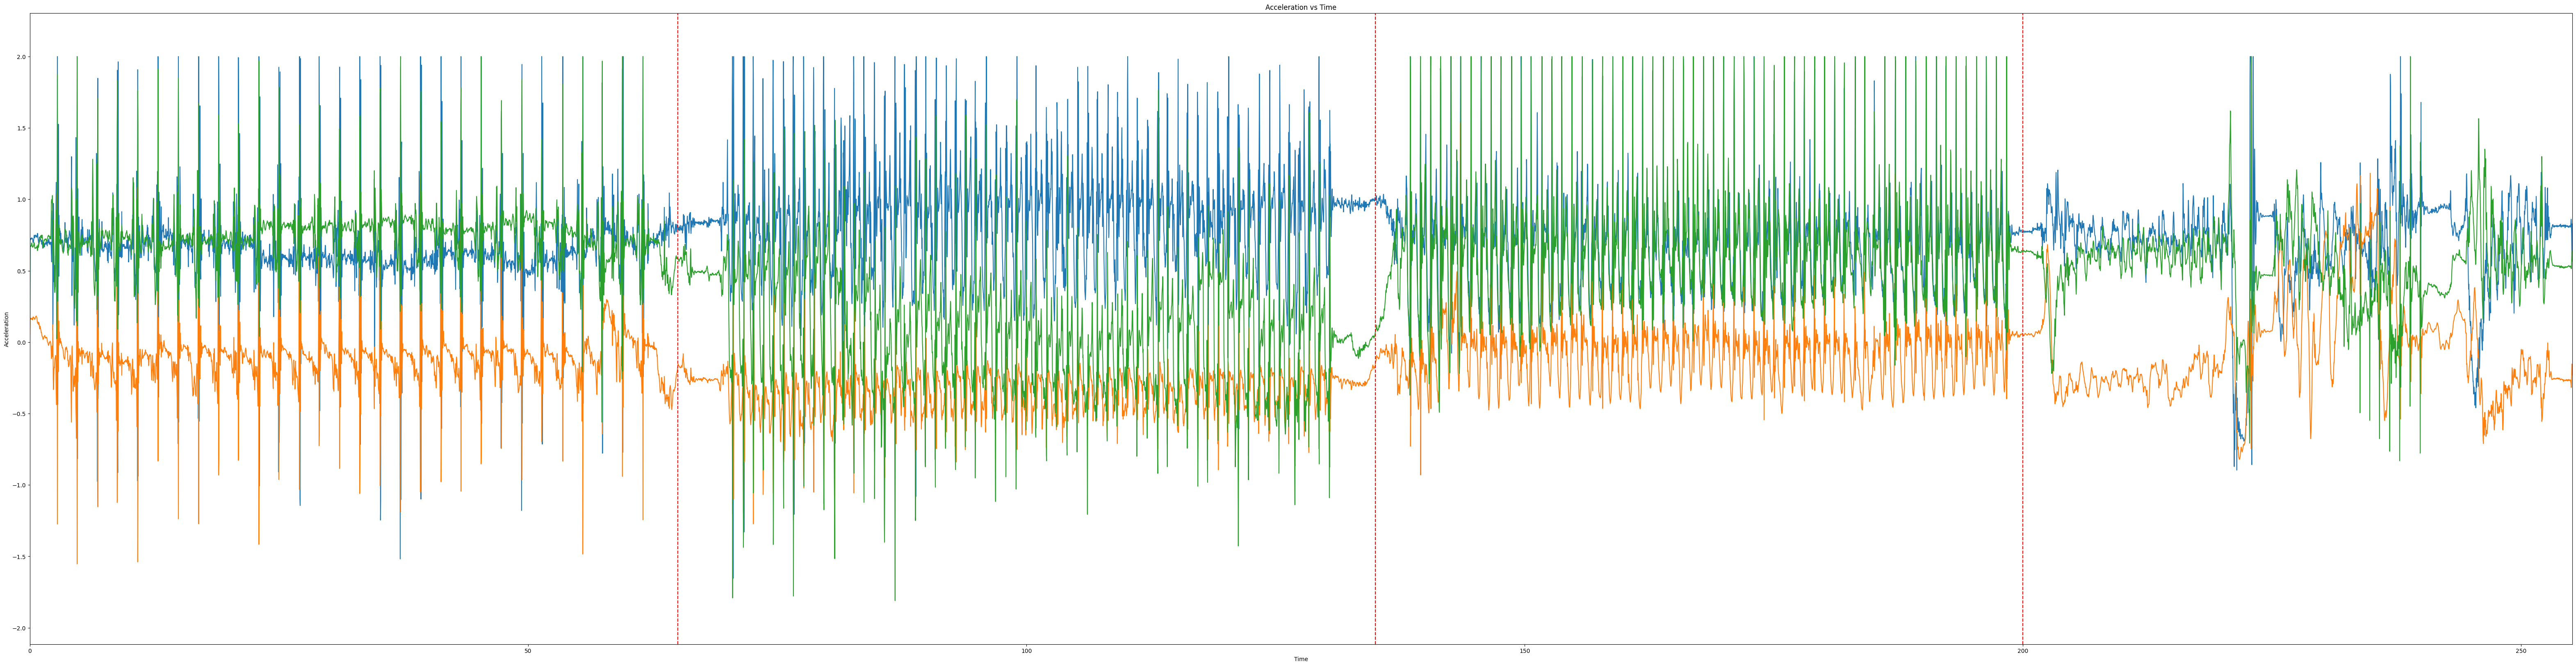

In [9]:
# Assuming 'time_values' is a list of specific time values where you want to draw vertical lines
time_values = [65, 135, 200]  # Example time values

# Plot the data
fig, ax = plt.subplots(figsize=(80, 20))
for col in ["x-acceleration", "y-acceleration", "z-acceleration"]:
    plt.plot(test_df["time"], test_df[col])

# Draw vertical lines at specific time values
for time_val in time_values:
    plt.axvline(x=time_val, color='r', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration vs Time')

plt.show()